<h1>IBM Capstone Project</h1>

<h2>The Battle of Neighborhoods - Exploring the possibility of start Oneline Food Delivery or Virtual Restaurant at Hong Kong</h2>

<h3>1. Introduction and Background of the Business problem:</h3>

Hong Kong is one of the most populous metropolitan area in the world, and a lot of top tier multinational companies are choice Hong Kong as APAC Headquarter.  As result of average office rents continue to rise in core business areas (e.g. Central district), those companies no long to consider to start their business at core business areas and relocated their office to areas with lower rents.

Darning working day, many office workers in Hong Kong start discussing where to have their lunch and that provide huge opportunities for restaurants in office area.  However, those restaurants are always full during the lunch hours (12:00 to 14:00) and office workers usually spend 15 to 30 mins line up for table in restaurant or fast food shop.  Therefore, the need for food delivery industry (or Virtual Restaurant) raise.

The food delivery industry in Asia market worth 53 billion US-dollars and which representing more than 50% of global demand.  Let's focus in Hong Kong, the consumer are well-known for demanding speed at lunch and which supported the online food delivery segment to reaching 615 million US-dollars for 2019, which grow 9.9% from 2018.

We will concentrate on one most condencsd business district; and we will use data science technology to generate the best location of each areas for stackholders. 

<h4>Target Audience</h4>

<ol>
    <li>Business personnel who have interest to invest on Virtual Restaurant.  This analysis will focuse on large pools of office workers in Hong Kong during lunch hours.</li>
    <li>Office worker who want to judge reasonable lunch/breakfast place for physical restaurant or switch to Virtaul Restaurant</li>
</ol>

<h3>2. Data Preparation</h3>

Based on the defination of business problem, the following factores will help to address problem:
<ul>
    <li>The number of existing restaurants in the neighborhood</li>
    <li>The distance of restaurant in the neightborhood</li>
    <li>Distance of neighborhood from selected business district</li>
</ul>
We will use regularly spaced circular grids of selected business district at Hong Kong to define neighborhoods.
<ul>
    <li>Getting coordinates of selected business district by <b>Geopy Client</b></li>
    <li>List out the number of restaurants in ervery neighborhood by <b>Foursquare API</b></li>
    <li>Collect the Hong Kong district name, pupulation, area and density from <b>Wikipedia Districts of Hong Kong</b></li>
</ul>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

print('Libraries imported.')

Libraries imported.


In [2]:
# Local storage path
path = 'D:\z-Coursera-IBM\Course9-Applied Data Science Capstone\projects\Coursera_Capstone'

<h4>Import HK Districts data</h4>

In [3]:
wiki_url = 'https://en.wikipedia.org/wiki/Districts_of_Hong_Kong#Population'
response_wikipage = requests.get(wiki_url).text
soup = BeautifulSoup(response_wikipage,'lxml')
my_table = soup.find('table', {'class':'wikitable sortable'})

Get coordinates of HK Districts by <b>Ceopy Client</b>

In [4]:
HK_districts_table = []
#locator = Nominatim(user_agent="HongKong_explorer") 
locator = Nominatim(user_agent="foursquare_agent")

for row in my_table.findAll('tr'):
    cols = row.findAll('td')
    if len(cols) == 6:
        location = locator.geocode(cols[0].text.strip())
        HK_districts_table.append((cols[0].text.strip(),cols[1].text.strip(),cols[2].text.strip(),cols[3].text.strip(),cols[4].text.strip(),cols[5].text.strip(),location.latitude,location.longitude))

In [5]:
HK_districts_table_array = np.asarray(HK_districts_table)
#len(HK_districts_table_array)

df_HK_districts = pd.DataFrame(HK_districts_table_array, 
                               columns = ['District','Chinese','Population','Area','Density','Region', 'latitude', 'longitude']
                              )
#df_HK_districts.set_index('District', inplace=True)
#df_HK_districts

In [6]:
df_HK_districts.Population = df_HK_districts.Population.astype('str')
df_HK_districts.Population = df_HK_districts.Population.str.replace(',', '')
df_HK_districts.Population = pd.to_numeric(df_HK_districts.Population)

df_HK_districts.Density = df_HK_districts.Density.astype('str')
df_HK_districts.Density = df_HK_districts.Density.str.replace(',', '')
df_HK_districts.Density = pd.to_numeric(df_HK_districts.Density)

df_HK_districts.Area = pd.to_numeric(df_HK_districts.Area)
df_HK_districts.latitude = pd.to_numeric(df_HK_districts.latitude)
df_HK_districts.longitude = pd.to_numeric(df_HK_districts.longitude)

df_HK_districts

,District,Chinese,Population,Area,Density,Region,latitude,longitude
0,Central and Western,中西區,244600,12.44,19983.92,Hong Kong Island,22.281322,114.160258
1,Eastern,東區,574500,18.56,31217.67,Hong Kong Island,1.178718,38.602580
2,Southern,南區,269200,38.85,6962.68,Hong Kong Island,31.990978,-102.071297
3,Wan Chai,灣仔區,150900,9.83,15300.10,Hong Kong Island,22.279015,114.172483
4,Sham Shui Po,深水埗區,390600,9.35,41529.41,Kowloon,22.328190,114.160854
5,Kowloon City,九龍城區,405400,10.02,40194.70,Kowloon,22.330160,114.189937
6,Kwun Tong,觀塘區,641100,11.27,56779.05,Kowloon,22.312937,114.225610
7,Wong Tai Sin,黃大仙區,426200,9.30,45645.16,Kowloon,22.341654,114.193859
8,Yau Tsim Mong,油尖旺區,318100,6.99,44864.09,Kowloon,22.307404,114.165526
9,Islands,離島區,146900,175.12,825.14,New Territories,33.838992,-96.759999


<h4>Collect data for the selected city/district of Hong Kong by Foursquare API</h4>

##### Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'V05E2JCVRUIJHP3AFKWJBKIBKEOUETYKF3FHFD2DKNXZZE45' # your Foursquare ID
CLIENT_SECRET = 'AZU10JZAMEYOJIUOAQ4JLVWWJZKIKKQGSIIATRBZBUUA1FLM' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
VERSION = '20191214' # Foursquare API version

limit = 100
radius = 500
#restaurant_categoryid = '4bf58dd8d48988d1c4941735' # Restaurant
office_categoryid = '4bf58dd8d48988d124941735' # Office
food_categoryid = '4d4b7105d754a06374d81259' # Food
hk_latitude, hk_longitude = 22.28552, 114.15769 # HK Latitude & Longitude for testing only

##### Send the GET Request and examine the results

In [8]:
#Function for get venues data from Foursquare API
def get_venues(c_id, c_secret, ver, lat, long, cat_id, rad, lim):
    venues = []
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        c_id, c_secret, ver, lat, long, cat_id, rad, lim)
    f_results = requests.get(url).json()

    return f_results['response']['venues']

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# keep only columns that include venue name, and anything that is associated with location
def filter_dataframe(df):
    fil_col = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
    df_fil = df.loc[:, fil_col]
    
    # filter the category for each row
    df_fil['categories'] = df_fil.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    df_fil.columns = [column.split('.')[-1] for column in df_fil.columns]

    return df_fil

In [9]:
df_HK_Office = pd.DataFrame()

for v_dist, v_lat, v_long in zip(df_HK_districts.District, df_HK_districts.latitude, df_HK_districts.longitude):
    venues = get_venues(CLIENT_ID, CLIENT_SECRET, VERSION, v_lat, v_long, office_categoryid, radius, limit)
    df_HK_Office = df_HK_Office.append(json_normalize(venues), ignore_index=True)

df_HK_Office = filter_dataframe(df_HK_Office)  

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


##### Perform data clearning process

In [10]:
df_HK_Office = df_HK_Office[df_HK_Office['cc']=='HK']
df_HK_Office = df_HK_Office.loc[df_HK_Office['address'].notna()]
df_HK_Office.shape

(163, 16)

##### Check duplicated Address

In [11]:
duplicate = df_HK_Office.duplicated('address',keep=False)
df_HK_Office[duplicate].sort_values('address')

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id


##### Look good, without any duplicated record at Office data frame.  Then let's continue data clearning process

In [12]:
df_HK_Office['city'].value_counts()

中環                 28
香港                 26
灣仔                 23
观塘                 16
Tsuen Wan           9
Kwun Tong           5
Wan Chai            3
West Kowloon        3
大角咀                 2
San Po Kong         2
Shatin              2
油麻地                 2
Central             1
Hong Kong 香港        1
Yuen Long           1
Kowloon             1
九龍                  1
九龙                  1
San Ko Pong         1
開源道47號 觀塘           1
深水埗區                1
青衣                  1
西貢                  1
New Territories     1
Sham Shui Po        1
Wanchai             1
Name: city, dtype: int64

In [13]:
df_HK_Office['city'].value_counts()

中環                 28
香港                 26
灣仔                 23
观塘                 16
Tsuen Wan           9
Kwun Tong           5
Wan Chai            3
West Kowloon        3
大角咀                 2
San Po Kong         2
Shatin              2
油麻地                 2
Central             1
Hong Kong 香港        1
Yuen Long           1
Kowloon             1
九龍                  1
九龙                  1
San Ko Pong         1
開源道47號 觀塘           1
深水埗區                1
青衣                  1
西貢                  1
New Territories     1
Sham Shui Po        1
Wanchai             1
Name: city, dtype: int64

##### Start focus on Central Business Districts (CBD) at Hong Kong and it can help to shotlisted target areas. Here is favorties cities lists

In [14]:
# Hong Kong Central Business District/City
hk_CBD = [
    {'city':'Central'},
    {'city':'Sheung Wan'},
    {'city':'Wan Chai'},
    {'city':'Causeway Bay'},
    {'city':'Yau Ma Tei'},
    {'city':'Tsim Sha Tsui'},
    {'city':'Mong Kok'},
    {'city':'Cheung Sha Wan'},
    {'city':'West Kowloon'},
    {'city':'Kowloon Bay'},
    {'city':'Kwun Tong'},
    {'city':'Tuen Mun'},
    {'city':'Sha Tin'},
    {'city':'Tung Chung'}
]

df_hk_CBD = pd.DataFrame(hk_CBD, columns=['city'])
df_hk_CBD

,city
0,Central
1,Sheung Wan
2,Wan Chai
3,Causeway Bay
4,Yau Ma Tei
5,Tsim Sha Tsui
6,Mong Kok
7,Cheung Sha Wan
8,West Kowloon
9,Kowloon Bay


In [15]:
df_CBD_Off = pd.merge(left=df_hk_CBD,right=df_HK_Office, left_on='city', right_on='city')
df_CBD_Off.shape

(12, 16)

In [16]:
list(df_CBD_Off)

['city',
 'name',
 'categories',
 'address',
 'cc',
 'country',
 'crossStreet',
 'distance',
 'formattedAddress',
 'labeledLatLngs',
 'lat',
 'lng',
 'neighborhood',
 'postalCode',
 'state',
 'id']

##### Drop some columns unused and backup clean data into .csv file

In [17]:
# Local storage path
#path = 'D:\z-Coursera-IBM\Course9-Applied Data Science Capstone\projects\Coursera_Capstone'
#CBD_Off_file = '\df_CBD_Off.csv'

df_CBD_Off = df_CBD_Off[['city','name','categories','distance','lat','lng']]
df_CBD_Off.to_csv(path+'\df_CBD_Off.csv', index=None,header=True)

#### Now we can start correct food information neary by the selected office in CBD

In [18]:
#create blank data from CBD Office -> Restaurant
df_Off_Rest = pd.DataFrame()

for v_dist, v_lat, v_long in zip(df_CBD_Off.city, df_CBD_Off.lat, df_CBD_Off.lng):
    venues = get_venues(CLIENT_ID, CLIENT_SECRET, VERSION, v_lat, v_long, food_categoryid, radius, limit)
    df_Off_Rest = df_Off_Rest.append(json_normalize(venues), ignore_index=True)

df_Off_Rest = filter_dataframe(df_Off_Rest)  

##### Perform data clearning process

In [19]:
df_Off_Rest = df_Off_Rest[df_Off_Rest['cc']=='HK']
df_Off_Rest = df_Off_Rest.loc[df_Off_Rest['address'].notna()]
df_Off_Rest.shape

(584, 16)

##### Check duplicated Address

In [20]:
duplicate = df_Off_Rest.duplicated('address',keep=False)
df_Off_Rest[duplicate].sort_values('address')

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
231,Le Pain Quotidien,Café,"1 Austin Road West, Shop 1089C, 1/F, ELEMENTS,...",HK,香港,香港,NaN,254,"[1 Austin Road West, Shop 1089C, 1/F, ELEMENTS...","[{'label': 'display', 'lat': 22.305485, 'lng':...",22.305485,114.162107,NaN,NaN,NaN,59b7a95d35811b271f231e85
281,Le Pain Quotidien,Café,"1 Austin Road West, Shop 1089C, 1/F, ELEMENTS,...",HK,香港,香港,NaN,241,"[1 Austin Road West, Shop 1089C, 1/F, ELEMENTS...","[{'label': 'display', 'lat': 22.305485, 'lng':...",22.305485,114.162107,NaN,NaN,NaN,59b7a95d35811b271f231e85
53,The Pawn,Gastropub,"1-3/F, 62 Johnston Rd",HK,灣仔,香港,NaN,274,"[1-3/F, 62 Johnston Rd, 灣仔區, 香港]","[{'label': 'display', 'lat': 22.276297, 'lng':...",22.276297,114.171486,NaN,NaN,灣仔區,4b0e0a22f964a520445423e3
101,The Pawn,Gastropub,"1-3/F, 62 Johnston Rd",HK,灣仔,香港,NaN,176,"[1-3/F, 62 Johnston Rd, 灣仔區, 香港]","[{'label': 'display', 'lat': 22.276297, 'lng':...",22.276297,114.171486,NaN,NaN,灣仔區,4b0e0a22f964a520445423e3
127,Xin Rong Ji (新榮記),Chinese Restaurant,"1/F&G/F, China Overseas Building, 138 Lockhart Rd",HK,Hong Kong,香港,NaN,388,"[1/F&G/F, China Overseas Building, 138 Lockhar...","[{'label': 'display', 'lat': 22.278032, 'lng':...",22.278032,114.172650,NaN,NaN,Hong Kong Island,5b1bd37d16ef67002c33c308
168,Xin Rong Ji (新榮記),Chinese Restaurant,"1/F&G/F, China Overseas Building, 138 Lockhart Rd",HK,Hong Kong,香港,NaN,337,"[1/F&G/F, China Overseas Building, 138 Lockhar...","[{'label': 'display', 'lat': 22.278032, 'lng':...",22.278032,114.172650,NaN,NaN,Hong Kong Island,5b1bd37d16ef67002c33c308
372,McDonald's (麥當勞),Fast Food Restaurant,"1/F, Crocodile Centre, 79 Hoi Yuen Rd",HK,香港,香港,NaN,352,"[1/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]","[{'label': 'display', 'lat': 22.31171507938806...",22.311715,114.225511,NaN,NaN,NaN,59a92e57112c6c22fee1af25
422,McDonald's (麥當勞),Fast Food Restaurant,"1/F, Crocodile Centre, 79 Hoi Yuen Rd",HK,香港,香港,NaN,581,"[1/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]","[{'label': 'display', 'lat': 22.31171507938806...",22.311715,114.225511,NaN,NaN,NaN,59a92e57112c6c22fee1af25
566,McDonald's (麥當勞),Fast Food Restaurant,"1/F, Crocodile Centre, 79 Hoi Yuen Rd",HK,香港,香港,NaN,221,"[1/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]","[{'label': 'display', 'lat': 22.31171507938806...",22.311715,114.225511,NaN,NaN,NaN,59a92e57112c6c22fee1af25
525,McDonald's (麥當勞),Fast Food Restaurant,"1/F, Crocodile Centre, 79 Hoi Yuen Rd",HK,香港,香港,NaN,475,"[1/F, Crocodile Centre, 79 Hoi Yuen Rd, 香港]","[{'label': 'display', 'lat': 22.31171507938806...",22.311715,114.225511,NaN,NaN,NaN,59a92e57112c6c22fee1af25


##### Opps, there are 4965 duplicated address and we need to clean those duplicated rows

In [21]:
df_Off_Rest.drop_duplicates('address',inplace=True, keep='first')
df_Off_Rest.shape

(307, 16)

In [22]:
duplicate = df_Off_Rest.duplicated('address',keep=False)
df_Off_Rest[duplicate].sort_values('address')

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id


##### Look good, without any duplicated record at Office data frame.  Then let's continue data clearning process

In [23]:
df_Off_Rest['city'].value_counts()

香港                  62
灣仔                  55
观塘                  35
中環                  35
油麻地                 29
West Kowloon        22
Kwun Tong           14
尖沙咀                  7
九龍                   7
Hong Kong            5
Jordan               4
金鐘                   3
Tsim Sha Tsui        3
Sheung Wan           3
Yau Ma Tei           2
佐敦                   2
牛头角                  2
tsim sha tsui        1
西九龍                  1
中区                   1
Soho                 1
Central District     1
Cha Kwo Ling         1
Central              1
Kwung Tong           1
Name: city, dtype: int64

<b>Create function for clean up incorrect city in Dataframe</b>

In [24]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="foursquare_agent")

def correct_dist(inx, add, city_lat, city_lng):
    for index, address, lat, lng in zip(inx, add, city_lat, city_lng):
        location = locator.reverse(str(lat)+','+str(lng))
        df_Off_Rest.loc[index, 'city'] = location.raw['address']['suburb'].split(' ',1)[1]

In [25]:
# Clean "中環"
c_City = '中環'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [27]:
# Clean "香港"
c_City = '香港'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [28]:
# Clean "灣仔"
c_City = '灣仔'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [29]:
# Clean "观塘"
c_City = '观塘'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [30]:
# Clean "油麻地"
c_City = '油麻地'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [31]:
# Clean "铜锣湾"
c_City = '铜锣湾'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [32]:
# Clean "深水埗區"
c_City = '深水埗區'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [ ]:
# Don't understand only '深水埗區' got problem but anyway we can fix it manually
#df_Off_Rest['city'].loc[df_Off_Rest['city']=='深水埗區'] = 'Sham Shui Po'

In [33]:
# Clean "九龍"
c_City = '九龍'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [34]:
# Clean "尖沙咀"
c_City = '尖沙咀'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [35]:
# Clean "中区"
c_City = '中区'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [36]:
# Clean "金鐘"
c_City = '金鐘'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [37]:
# Clean "牛头角"
c_City = '牛头角'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [38]:
# Clean "土瓜湾"
c_City = '土瓜湾'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [39]:
# Clean "佐敦"
c_City = '佐敦'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [40]:
# Clean "深水埗"
c_City = '深水埗'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [41]:
# Clean "跑马地"
c_City = '跑马地'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [42]:
# Clean "九龍城"
c_City = '九龍城'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [43]:
# Clean "九龙城"
c_City = '九龙城'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [44]:
# Clean "Kowloon City, Kowloon"
c_City = 'Kowloon City, Kowloon'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [45]:
# Clean "Mid-levels"
c_City = 'Mid-levels'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [46]:
# Clean "Central, Central and Western District"
c_City = 'Central, Central and Western District'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [47]:
# Clean "西九龍"
c_City = '西九龍'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [48]:
# Clean "大角咀港灣豪庭商場G47號鋪"
c_City = '大角咀港灣豪庭商場G47號鋪'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [49]:
# Clean "大角咀"
c_City = '大角咀'
correct_dist(df_Off_Rest.loc[df_Off_Rest['city']==c_City].index,
                             df_Off_Rest['address'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lat'].loc[df_Off_Rest['city']==c_City],
                             df_Off_Rest['lng'].loc[df_Off_Rest['city']==c_City])

In [50]:
df_Off_Rest['city'].value_counts()

Wan Chai            83
Kwun Tong           61
Yau Ma Tei          57
Central District    31
West Kowloon        22
Sheung Wan          20
Tsim Sha Tsui        7
Hong Kong            5
Jordan               4
Ngau Tau Kok         3
Cha Kwo Ling         1
Central              1
Kwung Tong           1
tsim sha tsui        1
Soho                 1
Name: city, dtype: int64

##### Those duplicated rows are cleaned and backup clean data into .csv file

In [51]:
#Off_Rest_file = '\df_Off_Rest.csv'

df_Off_Rest.to_csv(path+'\df_Off_Rest.csv', index=None,header=True)

In [53]:
df_Off_Rest.shape

(307, 16)

In [54]:
df_Off_Rest['categories'].value_counts()

Coffee Shop                      31
Café                             27
Chinese Restaurant               23
Fast Food Restaurant             21
Cha Chaan Teng                   17
Cantonese Restaurant             13
Noodle House                     11
Japanese Restaurant              10
Hong Kong Restaurant             10
Sandwich Place                    8
Italian Restaurant                8
Dim Sum Restaurant                7
Bakery                            7
Burger Joint                      6
Vietnamese Restaurant             6
Thai Restaurant                   6
Seafood Restaurant                6
Dessert Shop                      5
Sushi Restaurant                  4
Taiwanese Restaurant              4
Vegetarian / Vegan Restaurant     4
French Restaurant                 4
Food Court                        3
Restaurant                        3
Steakhouse                        3
Gastropub                         2
Spanish Restaurant                2
Bubble Tea Shop             

In [ ]:
# Local storage path
#path = 'D:\z-Coursera-IBM\Course9-Applied Data Science Capstone\projects\Coursera_Capstone'
#CBD_Off_file = '\df_CBD_Off.csv'
#Off_Rest_file = '\df_Off_Rest.csv'

<h3>3. Methodology</h3>

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

As the data collected as above, we can make use of contextualize data/cluster to help us to resolve the problem.

Combined the Foursquare venues data of different category of Hong Kong district, a matrix which captured restaurants information inside each district/cities. The weighted matrix able to help to shortlist 5 target locations with venues information to generate the resul that help to select best location to start new virtual restaurant business.

Before building the matrix, I have to prepare the required data and apply some data analysis.

In [55]:
#Now restore the prepared clean data
df_Off_Rest = pd.read_csv(path+'\df_Off_Rest.csv')

In [56]:
df_Off_Rest.shape

(307, 16)

#### Let's see the top 10 food and restarant can find in Hong Kong Central Business Distract

In [57]:
df_top5_cbd = df_Off_Rest['city'].value_counts().head(10)
df_top5_cbd

Wan Chai            83
Kwun Tong           61
Yau Ma Tei          57
Central District    31
West Kowloon        22
Sheung Wan          20
Tsim Sha Tsui        7
Hong Kong            5
Jordan               4
Ngau Tau Kok         3
Name: city, dtype: int64

#### Stackholder would like to focus on this 5 citys (Wan Chai, Central, Kwun Tong, Yau Ma Tei, Sheung Wan) out of  top 10 as above, because there are more business offices and factories building 

In [58]:
boss_choice = ['Wan Chai', 'Central District', 'Kwun Tong', 'Yau Ma Tei', 'Sheung Wan']
df_target_Off_Rest = df_Off_Rest[df_Off_Rest['city'].isin(boss_choice)]
df_target_Off_Rest.shape

(252, 16)

In [59]:
#df_top10_Off_Rest = df_Off_Rest['categories'].value_counts().head(10)
df_top10_Off_Rest = df_target_Off_Rest['categories'].value_counts().head(10)

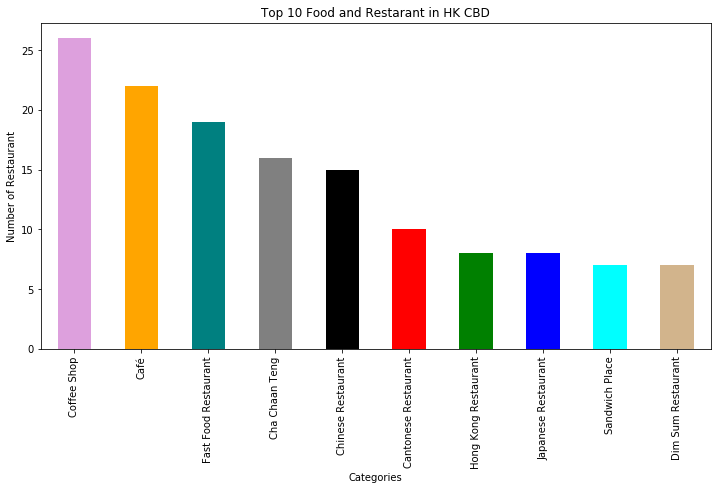

In [60]:
df_top10_Off_Rest.plot(kind='bar',figsize=(12,6),x='categories',color=['plum','orange','teal','grey','black','red','green','blue','cyan','tan'])
plt.title('Top 10 Food and Restarant in HK CBD')
plt.ylabel('Number of Restaurant')
plt.xlabel('Categories')

plt.show()

#### Visualize the data & Leaftlet Map for Top 5 Hong Kong CBD

In [61]:
# create map of Hong Kong using latitude and longitude values
locator = Nominatim(user_agent="HongKong_explorer") 
location = locator.geocode('Hong Kong')
hk_latitude = location.latitude
hk_longitude= location.longitude

fs_fill_color = {
    'Wan Chai': '#00ff00',
    'Central District': '#ff00ff',
    'Kwun Tong': '#0000ff',
    'Yau Ma Tei': '#ffa500',
    'Sheung Wan': '#ff0000'
}

# create map of Hong Kong using latitude and longitude values above:
map_HK = folium.Map(location=[hk_latitude, hk_longitude], zoom_start=12)

In [62]:
# add Districts markers to HK map
for lat, lng, city in zip(df_target_Off_Rest['lat'], df_target_Off_Rest['lng'], df_target_Off_Rest['city']):
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=3,
        popup=label,
        color=fs_fill_color[city],
        fill=True,
        fill_color=fs_fill_color[city],
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK)  
    
map_HK

Let's drew into each category of dataframe

In [63]:
# Prepare the top 10 food/restrant categories
top10_cat = []
for row_index in df_top10_Off_Rest.keys():
    top10_cat.append(row_index)

In [64]:
#df_target_count = df_target_Off_Rest[['city','categories','name']]
df_target_count = df_target_Off_Rest[['city','categories','name']].loc[df_target_Off_Rest['categories'].isin(top10_cat)]

df_target_count = df_target_count.groupby(['city','categories'], as_index=False).count()
df_target_count.rename(columns={'name':'count'}, inplace=True)

print(df_target_count.shape)
df_target_count.head()

(45, 3)


,city,categories,count
0,Central District,Café,1
1,Central District,Cantonese Restaurant,2
2,Central District,Cha Chaan Teng,2
3,Central District,Chinese Restaurant,1
4,Central District,Coffee Shop,5


In [65]:
df_target_count = df_target_count.pivot(index='city', columns='categories', values='count').fillna(0)
df_target_count

categories,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Coffee Shop,Dim Sum Restaurant,Fast Food Restaurant,Hong Kong Restaurant,Japanese Restaurant,Sandwich Place
city,,,,,,,,,,
Central District,1.0,2.0,2.0,1.0,5.0,2.0,2.0,1.0,2.0,2.0
Kwun Tong,7.0,1.0,6.0,3.0,6.0,0.0,8.0,1.0,4.0,1.0
Sheung Wan,1.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0
Wan Chai,8.0,5.0,5.0,6.0,9.0,1.0,4.0,3.0,1.0,3.0
Yau Ma Tei,5.0,2.0,2.0,5.0,3.0,2.0,4.0,2.0,1.0,1.0


In [66]:
df_target_count.describe()

categories,Café,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Coffee Shop,Dim Sum Restaurant,Fast Food Restaurant,Hong Kong Restaurant,Japanese Restaurant,Sandwich Place
count,5.000000,5.000000,5.000000,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,4.400000,2.000000,3.200000,3.00000,5.20000,1.400000,3.800000,1.600000,1.600000,1.400000
std,3.286335,1.870829,2.167948,2.54951,2.48998,0.894427,2.683282,0.894427,1.516575,1.140175
min,1.000000,0.000000,1.000000,0.00000,3.00000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.00000,3.00000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,5.000000,2.000000,2.000000,3.00000,5.00000,2.000000,4.000000,1.000000,1.000000,1.000000
75%,7.000000,2.000000,5.000000,5.00000,6.00000,2.000000,4.000000,2.000000,2.000000,2.000000
max,8.000000,5.000000,6.000000,6.00000,9.00000,2.000000,8.000000,3.000000,4.000000,3.000000


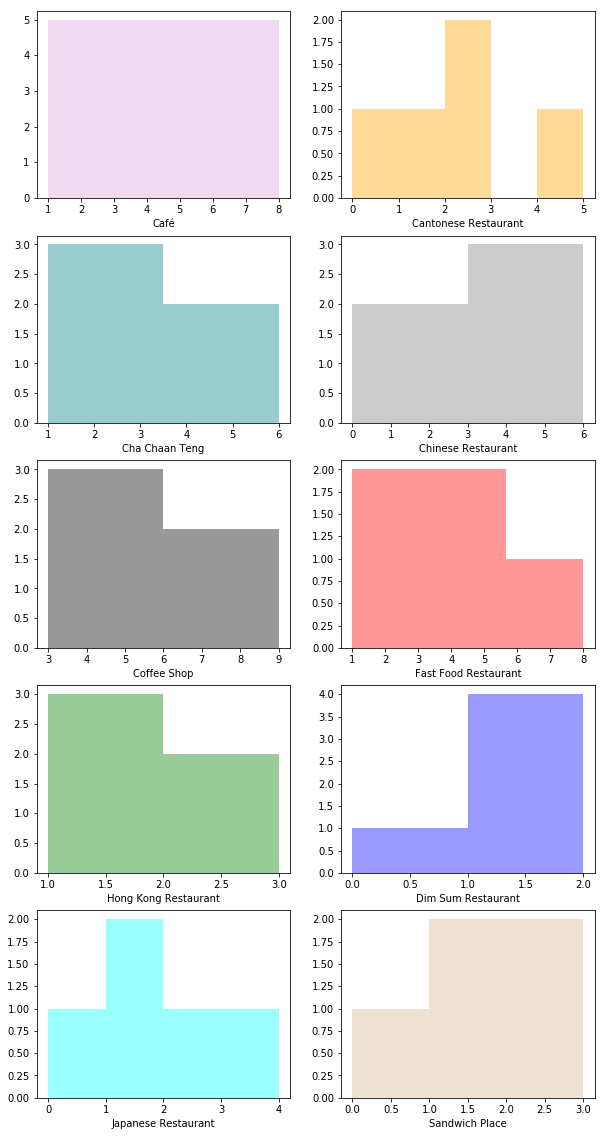

In [69]:
# 'plum','orange','teal','grey','black','red','green','blue','cyan','tan'

f, axes = plt.subplots(5, 2, figsize=(10, 20))
sns.distplot(df_target_count['Café'] , color="plum", ax=axes[0, 0], kde=False)
sns.distplot(df_target_count['Cantonese Restaurant'] , color="orange", ax=axes[0, 1], kde=False)

sns.distplot(df_target_count['Cha Chaan Teng'] , color="teal", ax=axes[1, 0], kde=False)
sns.distplot(df_target_count['Chinese Restaurant'] , color="grey", ax=axes[1, 1], kde=False)

sns.distplot(df_target_count['Coffee Shop'] , color="black", ax=axes[2, 0], kde=False)
sns.distplot(df_target_count['Fast Food Restaurant'] , color="red", ax=axes[2, 1], kde=False)

sns.distplot(df_target_count['Hong Kong Restaurant'] , color="green", ax=axes[3, 0], kde=False)
sns.distplot(df_target_count['Dim Sum Restaurant'] , color="blue", ax=axes[3, 1], kde=False)

sns.distplot(df_target_count['Japanese Restaurant'] , color="cyan", ax=axes[4, 0], kde=False)
sns.distplot(df_target_count['Sandwich Place'] , color="tan", ax=axes[4, 1], kde=False)

<h3>4. Clustering the Central Business District</h3>

Afterall, we are ready to cluster 5 selected Central Business District of Hong Kong.  And we based on the venue categories and use K-Means clustering.

In [70]:
#Prepare new dataframe for plot another map
ar_final = []

for inx in df_target_count.index:
    location = locator.geocode(inx)
    row = {
        'city': inx,
        'latitude': location.latitude,
        'longitude': location.longitude
    }
#    print(row)
    ar_final.append(row)


df_final = pd.DataFrame(ar_final)

In [71]:
df_final

,city,latitude,longitude
0,Central District,22.281322,114.160258
1,Kwun Tong,22.312937,114.225610
2,Sheung Wan,22.286870,114.150267
3,Wan Chai,22.279015,114.172483
4,Yau Ma Tei,22.312365,114.170779


Cluster by K-Means

In [72]:
# set number of clusters
kclusters = 5
#df_target_count

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_target_count)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 3, 1, 2, 0])

In [73]:
df_final.insert(1, 'cluster_label', kmeans.labels_)
df_final

,city,cluster_label,latitude,longitude
0,Central District,4,22.281322,114.160258
1,Kwun Tong,3,22.312937,114.225610
2,Sheung Wan,1,22.286870,114.150267
3,Wan Chai,2,22.279015,114.172483
4,Yau Ma Tei,0,22.312365,114.170779


In [74]:
# Backup final resultset to .csv file
df_target_count.to_csv(path+'\df_target_count.csv', index=None,header=True)
df_final.to_csv(path+'\df_final.csv', index=None,header=True)

#### polt  leaflet map for show final result

In [75]:
df_final = pd.read_csv(path+'\df_final.csv')

In [76]:
# create map of Hong Kong using latitude and longitude values
locator = Nominatim(user_agent="HongKong_explorer") 
location = locator.geocode('Hong Kong')
hk_latitude = location.latitude
hk_longitude= location.longitude

fs_fill_color = {
    'Wan Chai': '#00ff00',
    'Central District': '#ff00ff',
    'Kwun Tong': '#0000ff',
    'Yau Ma Tei': '#ffa500',
    'Sheung Wan': '#ff0000'
}

# create map of Hong Kong using latitude and longitude values above:
map_HK_final = folium.Map(location=[hk_latitude, hk_longitude], zoom_start=12)

In [77]:
for city, cluster, lat, lng in zip(df_final['city'], df_final['cluster_label'],df_final['latitude'],df_final['longitude']):
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=cluster*10,
        popup=label,
        color=fs_fill_color[city],
        fill=True,
        fill_color=fs_fill_color[city],
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map_HK_final)
    
    
map_HK_final

5 stackholder selected CBD of Hong Kong segmented into 4 clusters based on the most common venues.  The size of circles represents relation between food/restaurants and office building for each city.  Stockholder can consider locate more resource on <b>Central District</b> and <b>Kwun Tong</b>

<h3>5. Results and Discussion</h3>

With stackholder interested 5 cities and Food & Restaurants list which nearby the Hong Kong central business district, we successfully clustered it into 4 clusters based on the most common venues.  As the above leaflet map showing, we can finalize our recomentation to stakcholder that <b>Central District</b> and <b>Kwun Tong</b> are the areas they can start their Virtual Restaurants/Food Delivery business.  The followings are the finding in this analysis:

<ul>
    <li>The data corrected from Foursquire API are outdated and untrustworthy, and which spend too many time to perform clean data</li>
    <li>It was very difficult to find data source for this analysis</li>
</ul>

<h3>6. Conclusion</h3>

Finally in conclusion state, I am happy to said that the stockholder problem is resolved in this Data Science simulation project.  And also we experenced the real-live project of data science, which highly enhanced my python programming skil like web scraping and also experenced on call Foursqure API, geopy.geocoder for geting location information and generate leaflet map to help on data analysis process.

And of course, in real life, final decission will be made by stakeholders which based on more precise data source, and consideraton additional factors by profesional agents.